### Note: 
1. Use only Excel file only if .date would take same format as in excel file . Do not change to csv. It will make the format as DD/MM/YYYY

# 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Read dataset

In [2]:
data = pd.read_excel("ANZ synthesised transaction dataset.xlsx")

In [3]:
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


#### Small checks

In [4]:
data['currency'].value_counts() #AUD Australian dollar
data['txn_description'].value_counts() #
#POS => Point Of Sales (place where customer makes payment)
#Sales-Pos => Sales done at point of sales(sell of product and payment done at POS)
#Payment
#Inter Bank =>electronic transfer
#Phone bank => transactions using mobile phones.
# Merchant Id's are only available for POS or SalesPOS transaction description.


SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

 This dataset containing 3 months’ worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions.

In [5]:
print("The columns in the data set are:",data.columns)

The columns in the data set are: Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')


In [6]:
print("The data set shape is",data.shape) #check number of rows and columns in dataset.

The data set shape is (12043, 23)


# 3. Some basic checks 

## 3.1 Are there any data issues? Does the data need to be cleaned?



#### we should check that there are transactions of 100 customers

In [7]:
print("The dataset consists of {} customers with unique customer_id's".format(data['customer_id'].nunique()))

The dataset consists of 100 customers with unique customer_id's


#### we should now check that each transaction is a unique transaction

In [8]:
print("The dataset consists of {} transactions with unique transaction_id's".format(data['transaction_id'].nunique()))
print("The number of rows in dataset are",len(data))

The dataset consists of 12043 transactions with unique transaction_id's
The number of rows in dataset are 12043


#### We should check that there are transaction over a period of 3 months

In [9]:
data.date.describe()

C:\Users\PRANIT~1.SHI\AppData\Local\Temp/ipykernel_14384/3984613233.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.date.describe()


count                   12043
unique                     91
top       2018-09-28 00:00:00
freq                      174
first     2018-08-01 00:00:00
last      2018-10-31 00:00:00
Name: date, dtype: object

In [10]:
pd.date_range(start =  " 2018-08-01", end = "2018-10-31").difference(data.date)

DatetimeIndex(['2018-08-16'], dtype='datetime64[ns]', freq=None)

### Issue:
There is no 16 th August 2018 in the dates.

## 3.2 To get data type of each column and number of missing values .

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

#### Issue:
card_present_flag, bpay_biller_code, long_lat, txn_description, merchant_id, merchant_code, balance, date, merchant_suburb, merchant_State, extraction, country, customer_id, merchant_long_lat all  have missing values.

In [12]:
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values>0]
missing_percent =  round(missing_values/len(data) , 4)*100
pd.DataFrame({"Number of missing values":missing_values, "Percentage": missing_percent})

,Number of missing values,Percentage
card_present_flag,4326,35.92
bpay_biller_code,11158,92.65
merchant_id,4326,35.92
merchant_code,11160,92.67
merchant_suburb,4326,35.92
merchant_state,4326,35.92
merchant_long_lat,4326,35.92


Issue: There are reasonable number of missing values, i.e. more than 92% are present. We should deal with those values.


## 3.3 Checking behaviour of the numeric variables.

In [13]:
data.describe() #for nymerical variables indataest


,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


This function tells about numeric columns in the data set. 
Observations: 
1. Most of the card_present_flag are 1
2. The balance,age and amount of these customers looks good, without any abiguity.
3. Avearge age of customer is 30 years

# 4 Exploratory data analysis for all variables:

In [14]:
data.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [15]:
index = [x for x in range(len(data.columns))]
unique = []
categorical_index = []
categorical_variable = []

for i in index:
    unique.append(data[data.columns[i]].value_counts().value_counts().sum())    
print(unique)
for i in range(0,len(unique)):
    if unique[i] < 9: # maximum no.of. categories of a variable is 8
        categorical_index.append(i)
        categorical_variable.append(data.columns[i])

#print(categorical_index)
#set the number of unique values that sy=ubstitute to be in categorical variable.
#categorical_index = [x for x in unique if x<9]
#categorical_variables = [ data_nonnumeric_col[x] for x in unique]
#print(categorical_variable)

[2, 2, 3, 100, 1, 100, 6, 5725, 1, 80, 12006, 91, 2, 33, 1609, 8, 9442, 4457, 12043, 1, 100, 2703, 2]


In [16]:
pd.DataFrame({'Categorical_ variables':categorical_variable})

,Categorical_ variables
0,status
1,card_present_flag
2,bpay_biller_code
3,currency
4,txn_description
5,merchant_code
6,gender
7,merchant_state
8,country
9,movement


## 4.1 Categorical variables

### 1. status

In [17]:
data.status.value_counts(dropna = False)
# count number of types of entries in this column and dropna set to flase to get the missing values.

authorized    7717
posted        4326
Name: status, dtype: int64

###### authorized status of transaction: An authorized transaction is a debit or credit card purchase for which the merchant has received approval from the bank that issued the customer’s payment card.
###### Posted status of teansaction: I amount is deduced from the account holder already.

### 2. card_present_flag

In [18]:
data.card_present_flag.value_counts(dropna = False)

1.0    6194
NaN    4326
0.0    1523
Name: card_present_flag, dtype: int64

##### card_present_flag: 1 (yes) Credit or debit card transactions conducted face-to-face, in which the card is physically swiped
##### card_present_flag: 0 (No)  Credit or debit card transactions in which the merchant does not see or touch the card
##### NaN :missing values


### 3. bpay_biller_code

In [19]:
data.bpay_biller_code.value_counts(dropna = False)

NaN                                      11158
0                                          883
 THE DISCOUNT CHEMIST GROUP                  1
 LAND WATER & PLANNING East Melbourne        1
Name: bpay_biller_code, dtype: int64

### 4.currency

In [20]:
data.currency.value_counts(dropna = False)

AUD    12043
Name: currency, dtype: int64

We shall remove this column. since it do not contribute to our analysis.

### 5.txn_description

In [21]:
data.txn_description.value_counts(dropna = False)

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

##### Sales POS: The point of sale, or POS, is the location in a merchant’s establishment at which the sale is consummated by payment for goods or services received.

C:\Users\Pranita R. Shinde\anaconda3\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='txn_description', ylabel='count'>

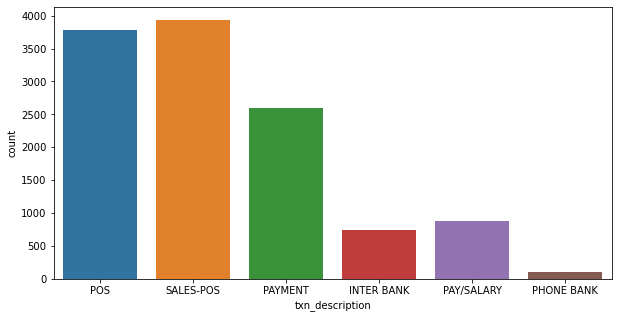

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
sns.countplot(data.txn_description)

In [23]:
data[['txn_description','amount','balance']].groupby('txn_description',as_index = False).mean().sort_values(by = 'amount',ascending = False)

,txn_description,amount,balance
1,PAY/SALARY,1898.728029,16242.859049
3,PHONE BANK,106.099010,37736.789703
0,INTER BANK,86.699461,23823.345997
2,PAYMENT,77.613077,19093.423212
4,POS,40.407412,11870.974148
5,SALES-POS,39.909789,11871.135859


### 6. merchant_code

In [24]:
data.merchant_code.value_counts(dropna = False)

NaN    11160
0.0      883
Name: merchant_code, dtype: int64

### 7. gender

In [25]:
data.gender.value_counts(dropna = False)

M    6285
F    5758
Name: gender, dtype: int64

In [26]:
data[['gender','amount','balance']].groupby('gender',as_index = False).mean().sort_values('amount', ascending = False)

,gender,amount,balance
1,M,205.721809,17125.519410
0,F,168.517303,12061.260431


C:\Users\Pranita R. Shinde\anaconda3\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

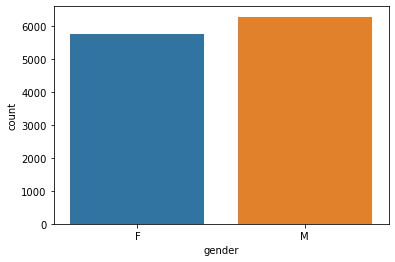

In [27]:
sns.countplot(data.gender)

### 8. merchant_state

In [28]:
data.merchant_state.value_counts(dropna = False)

NaN    4326
NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

C:\Users\Pranita R. Shinde\anaconda3\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='merchant_state', ylabel='count'>

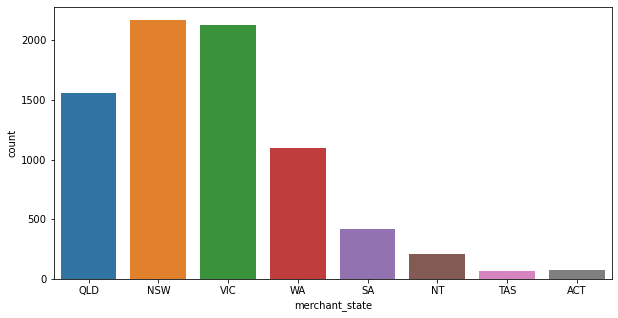

In [29]:
plt.figure(figsize = (10,5))
sns.countplot(data.merchant_state)

In [30]:
#to check 
#data.extraction.value_counts(dropna = False) 
# exaction is not categorical variable

### 9. country

In [31]:
data.country.value_counts(dropna=False)

Australia    12043
Name: country, dtype: int64

We shall remove this column. since it do not contribute to our analysis.

### 10. movement

In [32]:
data.movement.value_counts(dropna = False)

debit     11160
credit      883
Name: movement, dtype: int64

C:\Users\Pranita R. Shinde\anaconda3\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='movement', ylabel='count'>

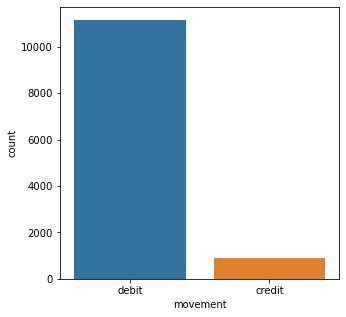

In [33]:
plt.figure(figsize = (5,5))
sns.countplot(data.movement)

### Step 4.2: Numerical variables



In [34]:
data_numeric_dataset = data.select_dtypes(include = [np.number]) #select only numeric variablesfron dataset
data_numeric_col = data_numeric_dataset.columns.values # talke numeeric columns
for col in data_numeric_col:
        missing = data[col].isnull()
        no_of_missing = np.sum(missing)
        if no_of_missing > 0:
            medn =data[col].median()
            data[col] =data[col].fillna(medn)
data_numeric_dataset

,card_present_flag,merchant_code,balance,age,amount
0,1.0,NaN,35.39,26,16.25
1,0.0,NaN,21.20,26,14.19
2,1.0,NaN,5.71,38,6.42
3,1.0,NaN,2117.22,40,40.90
4,1.0,NaN,17.95,26,3.25
...,...,...,...,...,...
12038,0.0,NaN,14054.14,30,9.79
12039,1.0,NaN,9137.79,20,63.87
12040,1.0,NaN,45394.57,28,43.96
12041,1.0,NaN,11350.67,69,30.77


### 1. Balance

<Figure size 360x360 with 0 Axes>

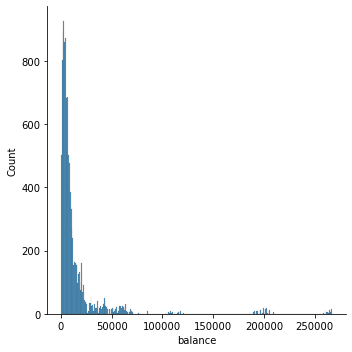

In [35]:
plt.figure(figsize = (5, 5))
sns.displot(data['balance'])

1. Most balance is between 0 to 25000.
2. Very few are greater than 70000 and less than 300000.


### 2. age

C:\Users\Pranita R. Shinde\anaconda3\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

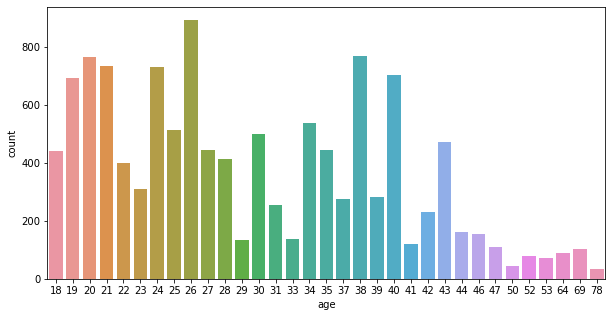

In [36]:
data.age.value_counts(dropna= False)
plt.figure(figsize = (10,5))
sns.countplot(data.age)

### 3. Amount

C:\Users\Pranita R. Shinde\anaconda3\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amount', ylabel='Density'>

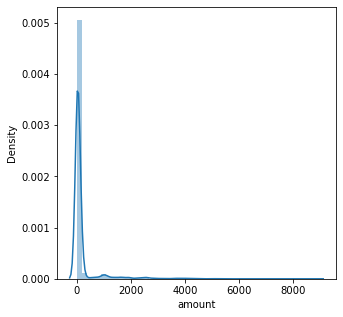

In [37]:
plt.figure(figsize=(5,5))
sns.distplot(data['amount'])



Most amount is arround 0 to 500 and a small peak around 1000 and very less then after

# 5 Feature Engineering 

In [38]:
#### 1.Remove the unwanted columns

In [39]:
data = data.drop(['currency','country'],axis =1)
data.shape

(12043, 21)

In [40]:
#### 2. Deal with missng values


In [41]:
pd.DataFrame({"Number of missing values": missing_values,"Percent missing":missing_percent}).sort_values(by = "Percent missing",ascending = True)

,Number of missing values,Percent missing
card_present_flag,4326,35.92
merchant_id,4326,35.92
merchant_suburb,4326,35.92
merchant_state,4326,35.92
merchant_long_lat,4326,35.92
bpay_biller_code,11158,92.65
merchant_code,11160,92.67


#### We can see that all components related to merchant are of same number and are missing fromhe data the reason might be that it will be due tio salary transactions that does not includes the merchant for payment to happen.
#### LETS INVESTIGATE IT!

In [42]:
# components which are not related to payment icludes under transaction named "Sales-POS" or "POS"
nonSales = data.loc[(data.txn_description !='SALES-POS') |(data.txn_description !='POS'),:]
nonSales.isnull().sum().sort_values(ascending = True)

status                   0
customer_id              0
transaction_id           0
amount                   0
extraction               0
age                      0
gender                   0
balance                  0
date                     0
merchant_code            0
txn_description          0
long_lat                 0
account                  0
card_present_flag        0
first_name               0
movement                 0
merchant_long_lat     4326
merchant_id           4326
merchant_suburb       4326
merchant_state        4326
bpay_biller_code     11158
dtype: int64

In [43]:
#### If we remove the SALES POS and POS we find exactly same number of missing values, which do not in clude the merchants hence, our idea was correct about salary and not sales.

In [44]:
nonSales_Column = (['merchant_long_lat','merchant_id','merchant_suburb','merchant_state'])
for col in nonSales_Column:
    data[col].fillna("n/a", inplace = True)
data.shape

(12043, 21)

In [45]:
# Since the null values in bpay_biller_code and mercant_code are having 92% , hence we will drop off those columns.

In [46]:
data = data.drop(['bpay_biller_code','merchant_code'],axis =1)
data.shape

(12043, 19)

In [47]:
data.isnull().sum()

status               0
card_present_flag    0
account              0
long_lat             0
txn_description      0
merchant_id          0
first_name           0
balance              0
date                 0
gender               0
age                  0
merchant_suburb      0
merchant_state       0
extraction           0
amount               0
transaction_id       0
customer_id          0
merchant_long_lat    0
movement             0
dtype: int64

In [48]:
### Create features for month, DayOfWeek

In [49]:
daily_amount = pd.DataFrame(data.groupby('date').amount.sum())
daily_amount.head()


,amount
date,
2018-08-01,29867.94
2018-08-02,21786.32
2018-08-03,38096.58
2018-08-04,6296.05
2018-08-05,4426.50


Text(0, 0.5, 'Transactions')

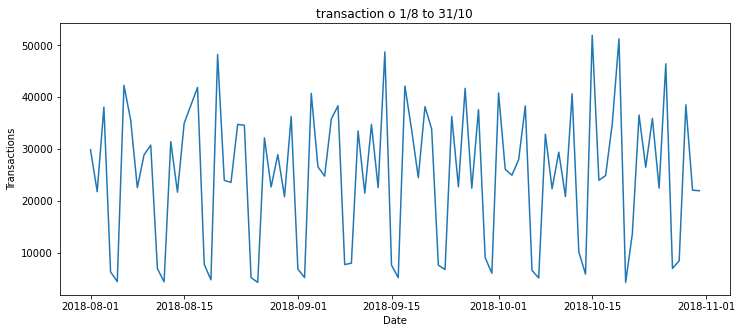

In [50]:
fig,ax = plt.subplots(figsize =(12,5))
ax.plot(daily_amount.index,daily_amount)
plt.title("transaction o 1/8 to 31/10")
plt.xlabel('Date')
plt.ylabel('Transactions')

In [51]:
data['month']=pd.DatetimeIndex(data.date).month

In [52]:
data['dayofweek'] = pd.DatetimeIndex(data.date).dayofweek

In [53]:
data['month']=pd.DatetimeIndex(data.date).month

In [54]:
data[['month','dayofweek','month']].head()

,month,dayofweek,month
0,8,2,8
1,8,2,8
2,8,2,8
3,8,2,8
4,8,2,8


In [55]:
#update extraction column 
#remove date from exaction column and keep only HH:MM:SS
print(data['extraction'])
data['extraction']=[timestamp.split("T")[1].split(".")[0] for timestamp in data['extraction']]
data.extraction.head()

0        2018-08-01T01:01:15.000+0000
1        2018-08-01T01:13:45.000+0000
2        2018-08-01T01:26:15.000+0000
3        2018-08-01T01:38:45.000+0000
4        2018-08-01T01:51:15.000+0000
                     ...             
12038    2018-10-31T23:09:06.000+0000
12039    2018-10-31T23:21:46.000+0000
12040    2018-10-31T23:34:25.000+0000
12041    2018-10-31T23:47:05.000+0000
12042    2018-10-31T23:59:44.000+0000
Name: extraction, Length: 12043, dtype: object


0    01:01:15
1    01:13:45
2    01:26:15
3    01:38:45
4    01:51:15
Name: extraction, dtype: object

In [56]:
data['hour']=[timestamp.split(":")[0] for timestamp in data['extraction']]

In [57]:
data.hour.dtype


dtype('O')

In [58]:
data['hour']=pd.to_numeric(data['hour'])

In [59]:
data.hour.dtype


dtype('int64')

In [60]:
# Deep Dive

In [61]:
data.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,month,dayofweek,hour
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,...,QLD,01:01:15,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit,8,2,1
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,...,NSW,01:13:45,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit,8,2,1
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,...,NSW,01:26:15,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,151.21 -33.87,debit,8,2,1
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,...,QLD,01:38:45,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,153.05 -26.68,debit,8,2,1
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,...,QLD,01:51:15,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,153.44 -28.06,debit,8,2,1


In [62]:
NonSales_Amount = data.loc[(data.txn_description!="SALES-POS") | (data.txn_description!="POS"),'amount']
NonSales_Amount

0        16.25
1        14.19
2         6.42
3        40.90
4         3.25
         ...  
12038     9.79
12039    63.87
12040    43.96
12041    30.77
12042    22.36
Name: amount, Length: 12043, dtype: float64

C:\Users\Pranita R. Shinde\anaconda3\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'NonSales transactions')

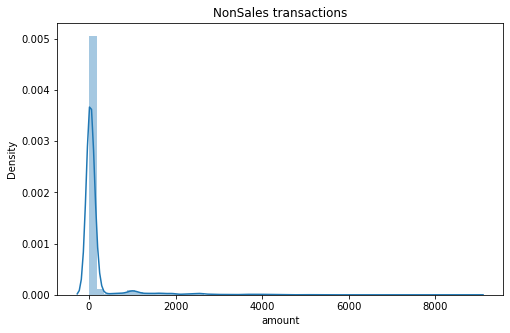

In [63]:
plt.figure(figsize=(8,5))
sns.distplot(NonSales_Amount)
plt.title("NonSales transactions")

C:\Users\Pranita R. Shinde\anaconda3\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Overall transactions')

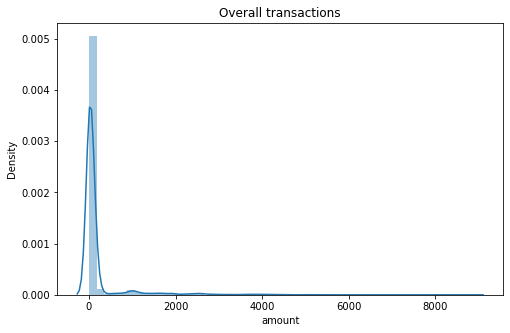

In [64]:
plt.figure(figsize=(8,5))
sns.distplot(data.amount)
plt.title("Overall transactions")

In [65]:
data.amount.describe()

count    12043.000000
mean       187.933588
std        592.599934
min          0.100000
25%         16.000000
50%         29.000000
75%         53.655000
max       8835.980000
Name: amount, dtype: float64

In [66]:
#39minute


In [67]:
data.loc[data.txn_description == "PAY/SALARY", "category"] = "Salary"
data.loc[(data.txn_description == "SALES-POS") | (data.txn_description == "POS"), "category"] = "Purchase"
data.category.fillna("Others", inplace = True)
data[["txn_description", "category"]].head(10)


,txn_description,category
0,POS,Purchase
1,SALES-POS,Purchase
2,POS,Purchase
3,SALES-POS,Purchase
4,SALES-POS,Purchase
5,PAYMENT,Others
6,SALES-POS,Purchase
7,POS,Purchase
8,POS,Purchase
9,INTER BANK,Others


In [68]:
#save data
data.to_pickle('C:/Users/Pranita R. Shinde/Desktop/Miss Pranita/Internships/ANZ_July2021/ANZ_2.pkl')